# MaterialsCoord benchmarking – ternary materials scores

Benchmark and plot the results of the near neighbor algorithms on ternary structures.

*Written using:*
- MaterialsCoord==0.2.0

*Authors: Hillary Pan, Alex Ganose (03/30/20)*

---

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(tol=0.5), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose the elemental structure set.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the benchmark scores for each algorithm for the cation sites.

In [3]:
cation_scores = bm.score(nn_methods, site_type="cation")
cation_scores

/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3955: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3749: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
CaFe2O4_166080,0.000000,3.333333,0.000000,6.666667,0.000000,0.000000,0.000000,0.000000
K2NiF4_73450,0.000000,11.333333,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
MgAl2O4_spinel_31373,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
CaB2O4_34641,0.666667,2.000000,0.666667,2.666667,0.666667,0.000000,0.000000,0.000000
Fe2SiO4_olivine_4353,0.666667,3.333333,0.666667,2.666667,0.000000,0.000000,0.000000,0.000000
Be2SiO4_phenakite_64942,0.000000,0.000000,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000
BaAl2O4_21080,0.000000,5.666667,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
Na2SO4_thenardite_2895,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
Sr2PbO4_16806,0.666667,7.333333,0.666667,5.333333,0.666667,0.000000,0.000000,0.000000
K2SO4_beta_2827,2.666667,11.333333,2.666667,6.666667,1.666667,2.666667,0.666667,0.333333


Plot the cation results.

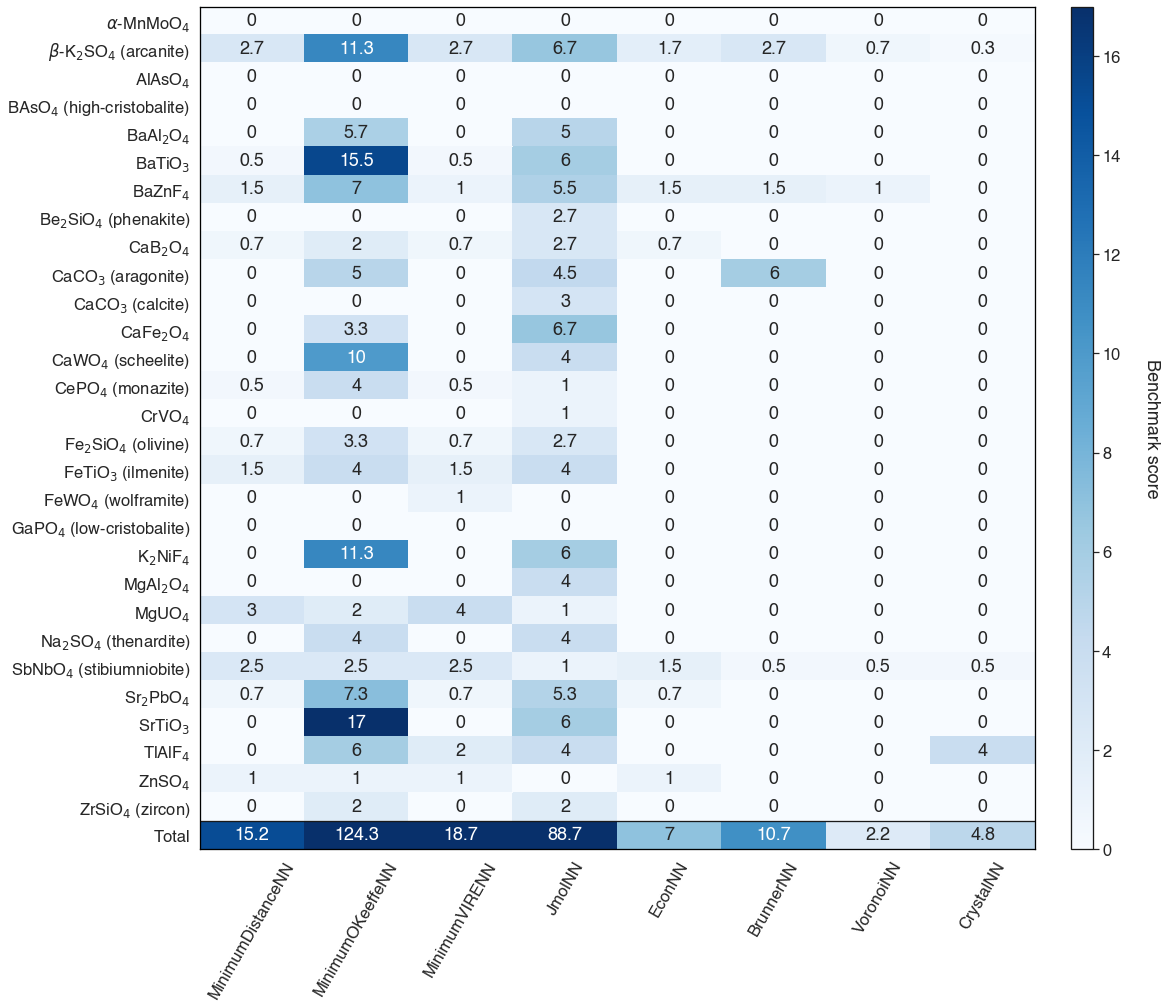

In [4]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    cation_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)
 
plt.savefig(Path("plots", "ternary-cation.pdf"), bbox_inches='tight')
plt.show()

Calculate the benchmark scores for each algorithm for the anion sites.

In [5]:
anion_scores = bm.score(nn_methods, site_type="anion")
anion_scores

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
CaFe2O4_166080,0.000000,0.50,0.000000,2.00,0.00,0.00,0.00,0.00
K2NiF4_73450,0.000000,0.00,0.000000,4.50,0.00,0.00,0.00,0.00
MgAl2O4_spinel_31373,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
CaB2O4_34641,2.000000,2.00,2.000000,3.50,2.00,1.50,1.50,1.50
Fe2SiO4_olivine_4353,0.500000,0.50,0.500000,0.00,0.00,0.00,0.00,0.00
Be2SiO4_phenakite_64942,0.000000,0.00,0.000000,2.00,0.00,0.00,0.00,0.00
BaAl2O4_21080,0.000000,0.75,0.000000,2.25,0.00,0.00,0.00,0.00
Na2SO4_thenardite_2895,0.000000,2.00,0.000000,3.00,0.00,0.00,0.00,0.00
Sr2PbO4_16806,0.500000,3.50,0.500000,3.50,0.50,0.00,0.00,0.00
K2SO4_beta_2827,2.000000,5.00,5.000000,5.00,0.75,0.00,0.50,0.25


Plot the anion results.

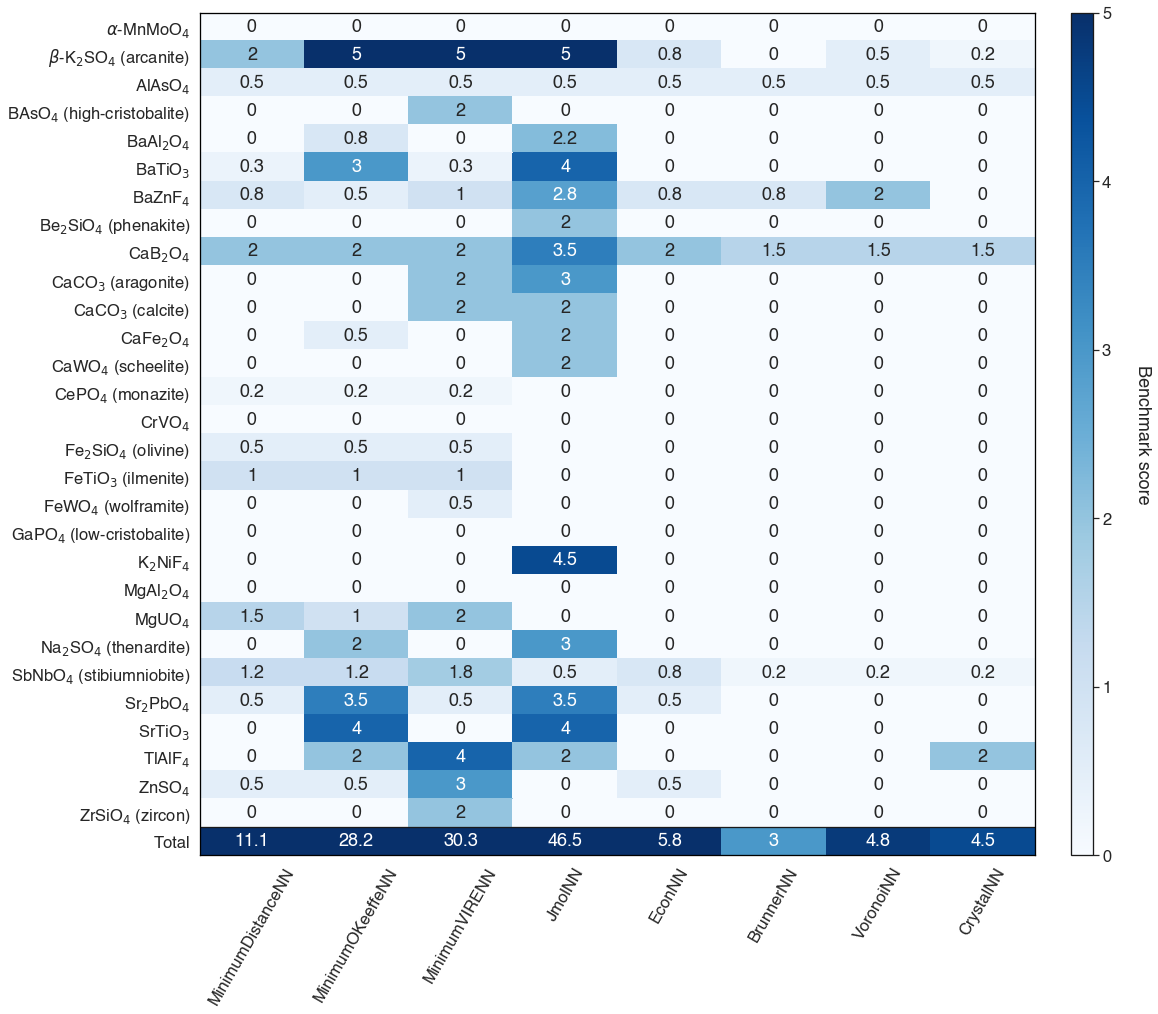

In [6]:
plt = plot_benchmark_scores(
    anion_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "ternary-anion.pdf"), bbox_inches='tight')
plt.show()

## Cation–Anion coordination only

The performance of several of the near neighbor methods is strongly affected if only cation to anion bonding is considered. The benchmarking object has an option (`cation_anion`) to limit bonds to those between sites of opposing charge. Here, we run the benchmark on ternary structures with `cation_anion=True` set.

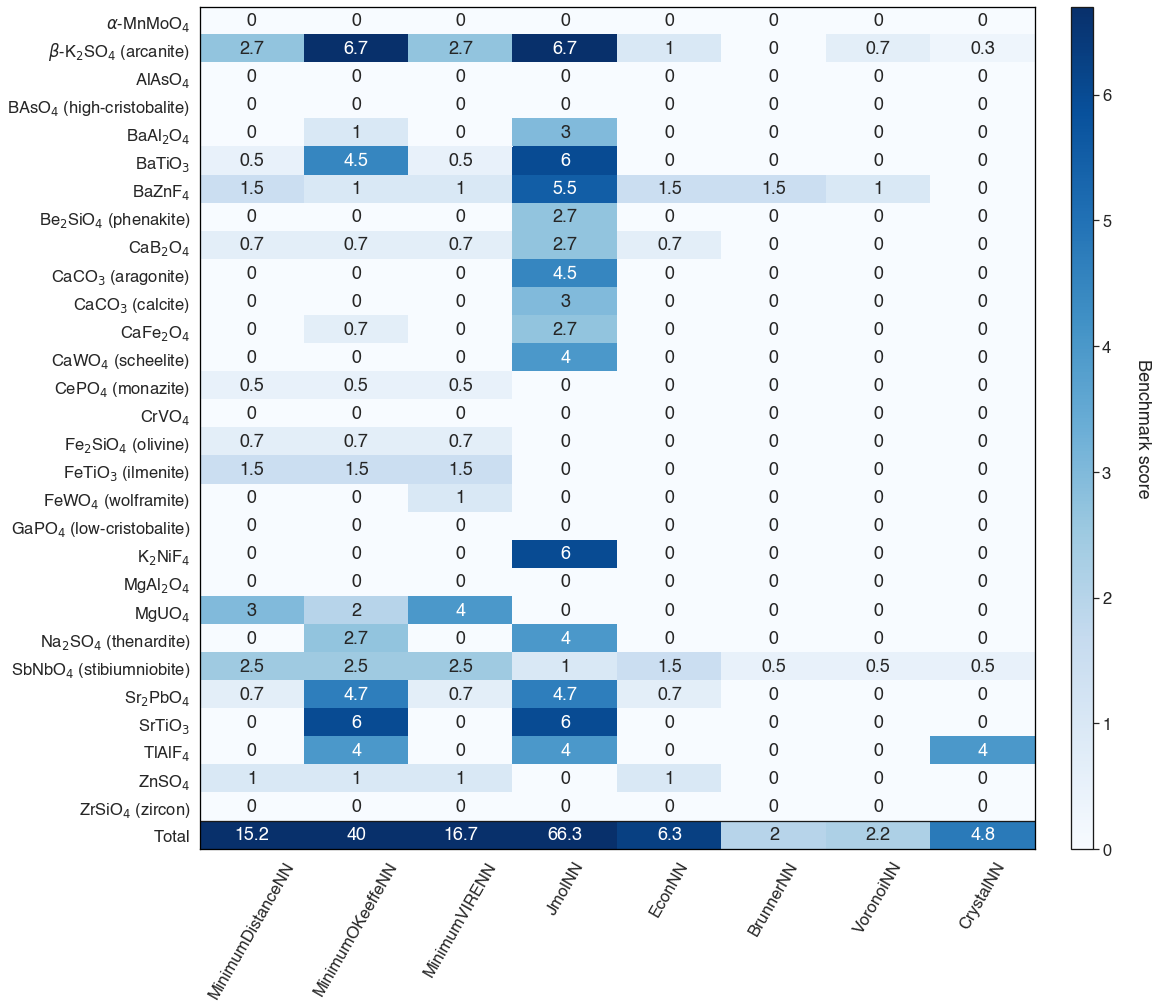

In [7]:
cation_scores = bm.score(nn_methods, site_type="cation", cation_anion=True)

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    cation_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "ternary-cation-cation-anion.pdf"), bbox_inches='tight')
plt.show()

Do the same for anion scores.

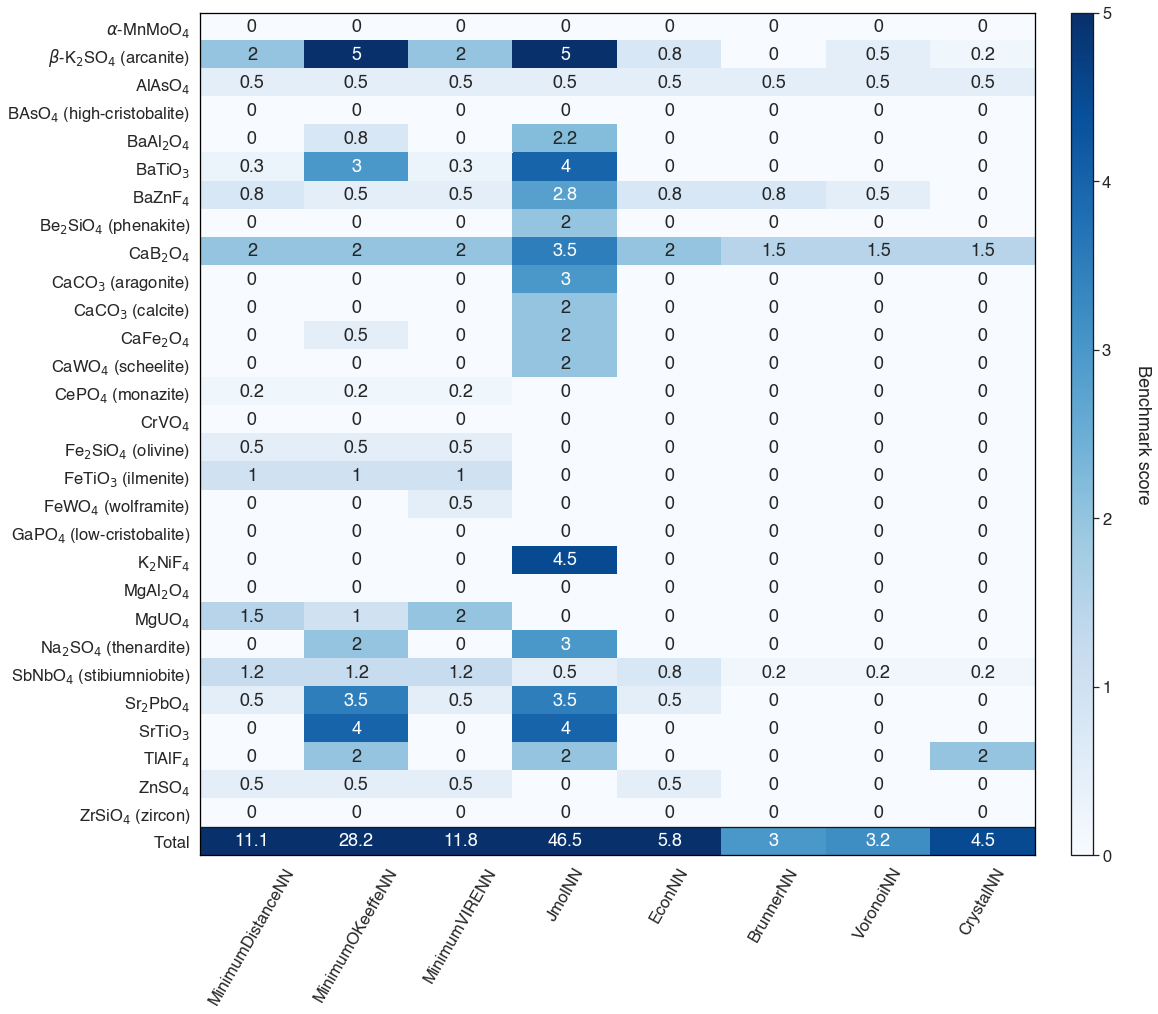

In [8]:
anion_scores = bm.score(nn_methods, site_type="anion", cation_anion=True)

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    anion_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "ternary-anion-cation-anion.pdf"), bbox_inches='tight')
plt.show()